c:\Users\Mel\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Mel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Mel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Mel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly d

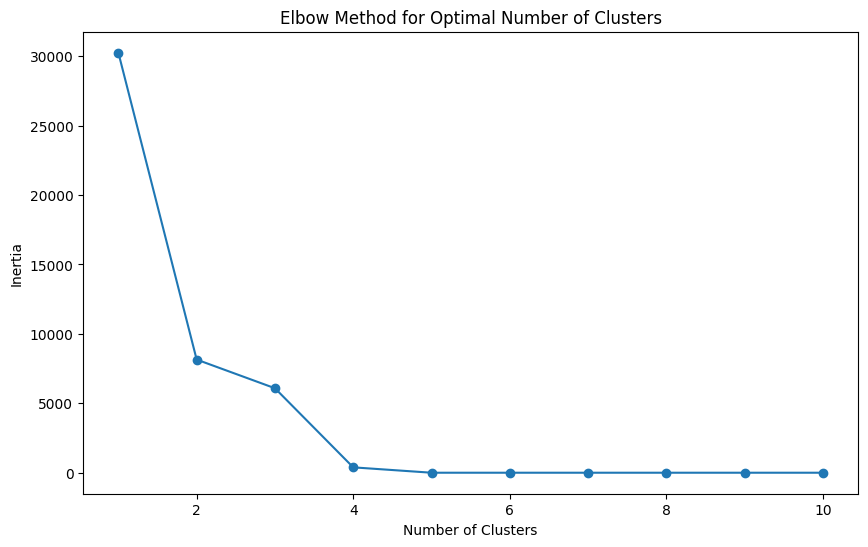

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Load dataset into a pandas DataFrame
df = pd.read_csv("hf://datasets/lllaurenceee/Shopee_Bicycle_Reviews/Dataset_D_Duplicate.csv")

# Convert DataFrame to a list of lists and extract headers
data = df.values.tolist()
headers = df.columns.tolist()

def plot_elbow_method(data, column_idx, max_clusters=10):
    X = np.array([row[column_idx] for row in data]).reshape(-1, 1)

    # Check if the data is categorical
    if isinstance(X[0][0], str):
        # Convert categorical data to numeric
        encoder = LabelEncoder()
        X_encoded = encoder.fit_transform(X.flatten()).reshape(-1, 1)
        X_scaled = X_encoded
    else:
        # Scale the data if it's continuous
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

    inertia = []
    cluster_range = range(1, max_clusters + 1)

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the elbow method
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

# Example usage to find the optimal number of clusters
column_idx = 10  # Replace with the index of the column you want to analyze
plot_elbow_method(data, column_idx, max_clusters=10)
